In [1]:
import sys
sys.path.append("../dataset/")

import datetime
import glob
import json
import matplotlib.pyplot as plt
import nrrd
import numpy as np
import os
import tensorflow as tf

from argparse import ArgumentParser, ArgumentDefaultsHelpFormatter
from dataset import UltraSoundImages
from keras_unet_collection import models
from tensorflow.keras.utils import Sequence
from tensorflow import keras
from tensorflow.keras.preprocessing.image import save_img
from utils import plot_history

In [2]:
# Prepare data generator
raw_dir = "../RawUSGimagesNRRD"
raw_images = raw_dir + "/data_output"
raw_masks = raw_dir + "/masks"

raw_images_paths = sorted(glob.glob(raw_images + '**/*', recursive=True))
raw_masks_paths = sorted(glob.glob(raw_masks + '**/*', recursive=True))

TEST_LEN = 10
VAL_LEN = 60
TRAIN_LEN = len(raw_images_paths) - VAL_LEN - TEST_LEN
batch_size = 2

train_images = raw_images_paths[:TRAIN_LEN]
validation_images = raw_images_paths[-(VAL_LEN+TEST_LEN):-TEST_LEN]
test_images =  raw_images_paths[-TEST_LEN:]

train_masks = raw_masks_paths[:TRAIN_LEN]
validation_masks = raw_masks_paths[-(VAL_LEN+TEST_LEN):-TEST_LEN]
test_masks =  raw_masks_paths[-TEST_LEN:]

train_gen = UltraSoundImages(batch_size, train_images, train_masks, size=(512,512))
val_gen = UltraSoundImages(batch_size, validation_images, validation_masks, size=(512,512))
test_gen = UltraSoundImages(batch_size, test_images, test_masks, size=(512,512))

Loading images from NRRD format and resizing
Finished loading
Loading images from NRRD format and resizing
Finished loading
Loading images from NRRD format and resizing
Finished loading


In [3]:
images, masks = val_gen.__getitem__(5)
image = images[0]
mask = masks[0]

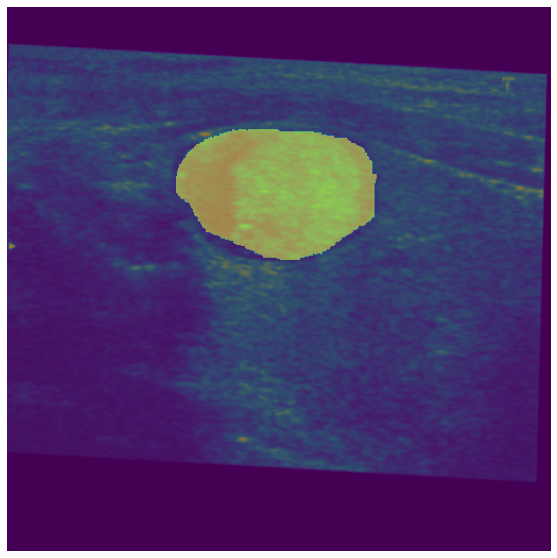

In [4]:
plt.figure(figsize=(10, 10))
plt.imshow(image)
plt.imshow(mask, alpha=0.5)
plt.axis('off')
plt.show()

In [5]:
def plot_history(history):
    # Extract the history values
    loss = history['loss']
    acc = history['accuracy']
    val_loss = history['val_loss']
    val_acc = history['val_accuracy']

    # Plot the loss values
    plt.figure(figsize=(16, 8))
    plt.plot(loss)
    plt.plot(val_loss)
    plt.title('Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend(['Training', 'Validation'])
    plt.show()

    # Plot the accuracy values
    plt.figure(figsize=(16, 8))
    plt.plot(acc)
    plt.plot(val_acc)
    plt.title('Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend(['Training', 'Validation'])
    plt.show()

## Load Model

In [8]:
def create_report(path):
    base_path = f'output/{path}'
    model_path = f'{base_path}model/model'
    meta_path = f'{base_path}meta/'
    history = json.load(open(meta_path+'history.json'))
    plot_history(history)
    model = tf.keras.models.load_model(model_path)
    output_mask = model.predict(np.expand_dims(image, axis=[0,3]))[0]
    plt.figure(figsize=(15, 15))
    plt.imshow(image)
    plt.imshow(output_mask, alpha=0.5)
    plt.axis('off')
    plt.show()
    print(model.summary())

### Classic U-Net

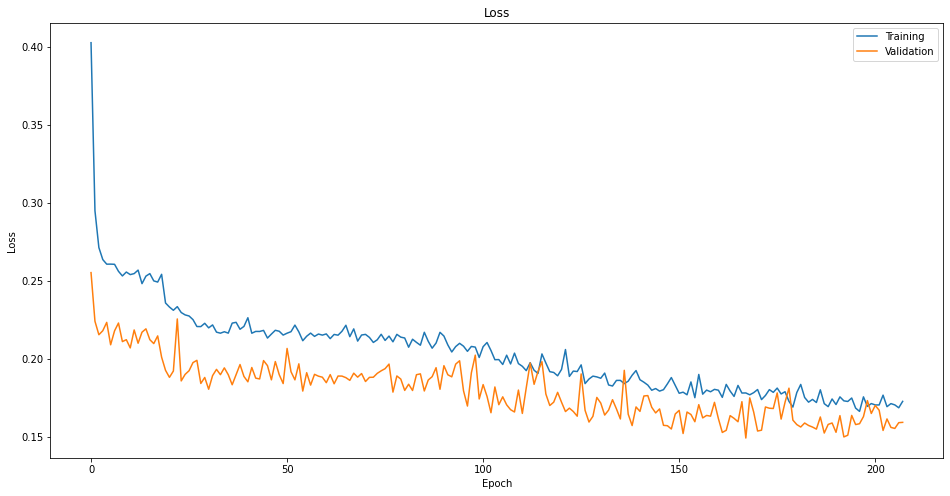

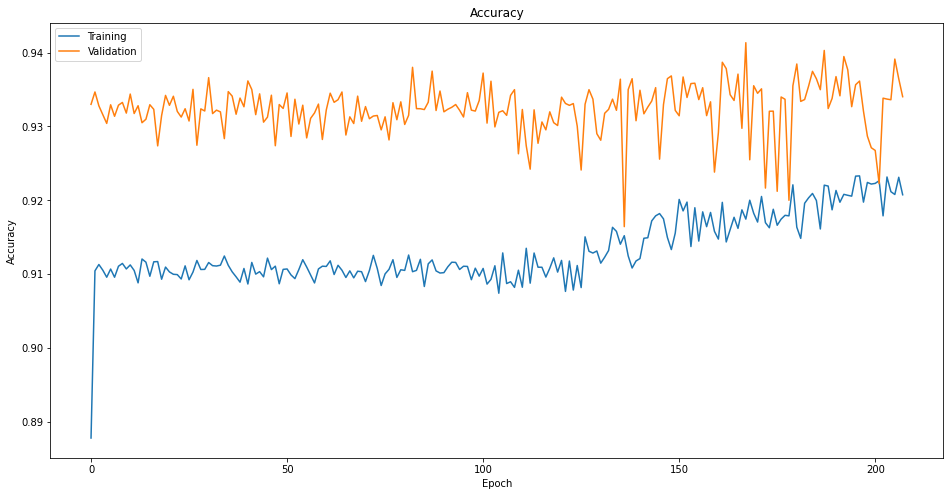

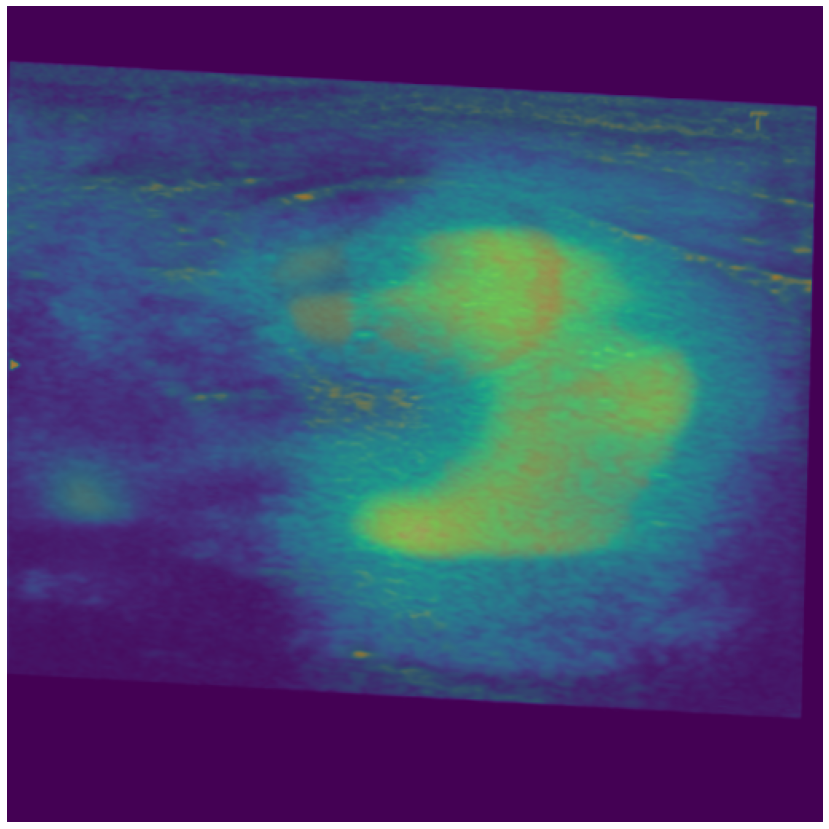

Model: "unet_model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 512, 512, 1) 0                                            
__________________________________________________________________________________________________
unet_down0_0 (Conv2D)           (None, 512, 512, 64) 640         input_1[0][0]                    
__________________________________________________________________________________________________
unet_down0_0_activation (ReLU)  (None, 512, 512, 64) 0           unet_down0_0[0][0]               
__________________________________________________________________________________________________
unet_down0_1 (Conv2D)           (None, 512, 512, 64) 36928       unet_down0_0_activation[0][0]    
_________________________________________________________________________________________

In [9]:
create_report('unet_2d/2023-04-03-20-00-39/')

### U^2-Net

In [ ]:
create_report('u2net_2d/')

### U-Net 3+

### Trans U-Net

### Swin U-Net